In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from functions import abbr_substitutor, make_sentence_df, count_words, split_into_sentences
import collections
import re
from collections import Counter
import statistics
from nltk.tokenize import sent_tokenize


pd.set_option('display.max_colwidth', None)
#replace with path to the cleaned careplan reports
df = pd.read_csv('careplan_reports_cleaned.csv', sep=',', encoding='latin-1')
df

C:\Users\f.tomassen\AppData\Local\Temp\ipykernel_19784\1521612405.py:16: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,19,20,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('careplan_reports_cleaned.csv', sep=',', encoding='latin-1')


,objectId,carePlanEntryObjectId,carePlanLinkId,clientObjectId,employeeObjectId,reportingDate,reportTypeObjectId,systolicPressure,diastolicPressure,pulsePressure,...,parentObjectId,parentType,carenObjectId,carenName,carenRole,status,episodeId,restrictiveMeasureId,createdAt,updatedAt
0,1950,NaN,NaN,761638,762059,2011-12-05 16:19:14,109,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2011-12-05 16:19:14,2011-12-05 16:19:14
1,2250,NaN,NaN,234932,762456,2011-12-06 12:38:44,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2011-12-06 12:38:44,2011-12-06 12:38:44
2,2251,NaN,NaN,761638,762456,2011-12-06 12:45:42,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2011-12-06 12:45:42,2011-12-06 12:45:42
3,2300,NaN,NaN,761638,762456,2011-12-07 08:00:47,103,172,80.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2011-12-07 08:00:47,2011-12-07 08:00:47
4,2301,NaN,NaN,761700,762456,2011-12-07 15:16:49,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2011-12-07 15:16:49,2011-12-07 15:16:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865199,13547846,NaN,NaN,1717999,884694,2022-04-26 06:06:01,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2022-04-26 06:06:00,2022-04-26 06:06:00
12865200,13547847,NaN,NaN,1718156,1705709,2022-04-26 06:07:14,315,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2022-04-26 06:07:13,2022-04-26 06:07:13
12865201,13547848,NaN,NaN,1721752,1704463,2022-04-25 20:00:23,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2022-04-26 06:07:31,2022-04-26 06:07:31
12865202,13547849,NaN,NaN,1720394,884694,2022-04-26 06:07:59,101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2022-04-26 06:07:58,2022-04-26 06:07:58


In [7]:
#Preprocess the messy data
df['comment'] = df['comment'].fillna('')
df = df.drop(df[df['comment'] == ''].index)
df['preprocessed'] = df['comment'].apply(abbr_substitutor)
preprocessed_df = df[['comment', 'preprocessed']]
preprocessed_df = preprocessed_df.drop(preprocessed_df[preprocessed_df['comment'] == ''].index)
preprocessed_df

OSError: [Errno 28] No space left on device

In [4]:
#preprocessed_df=pd.read_csv('E:\Data_exploration\careplan_reports_preprocessed.csv', encoding='latin-1')

Data distribution

In [12]:
preprocessed_df['num_words'] = preprocessed_df['comment'].apply(lambda x: len(str(x).split()))
pruned_df = preprocessed_df[(preprocessed_df['num_words'] < 150) & (preprocessed_df['num_words'] > 2)]#['comments']
pruned_df.to_csv('careplan_reports_preprocessed.csv', index=False)

In [18]:
def plot_distribution(df, max_x=50):
    # Extract the column of interest
    data = df['num_words']
    # Count the occurrences of each unique value
    value_counts = data.value_counts()

    # Plot the bar chart
    plt.bar(value_counts.index, value_counts.values, color='g', alpha=0.6)
    plt.xlabel('Words in text')
    plt.ylabel('Frequency')
    plt.title('Frequency of entry length')
    plt.grid(True)

    # Set x-axis limits to focus on the majority of the points between 0 and 100
    plt.xlim(0, max_x)

    plt.show()

In [19]:
def calculate_word_statistics(df, column_name):
    # Calculate the mean and standard deviation of the number of words per entry
    mean_words = df['num_words'].mean()
    std_words = df['num_words'].std()
    median_words = df['num_words'].median()
    min_words = df['num_words'].min()
    max_words = df['num_words'].max()
    percentile_25 = df['num_words'].quantile(0.25)
    percentile_75 = df['num_words'].quantile(0.75)
    percentile_5 = df['num_words'].quantile(0.05)
    percentile_95 = df['num_words'].quantile(0.95)

    print("Average number of words per entry:", mean_words)
    print("Standard deviation of words per entry:", std_words)
    print("Median number of words per entry:", median_words)
    print("Minimum number of words per entry:", min_words)
    print("Maximum number of words per entry:", max_words)
    print("25th percentile of words per entry:", percentile_25)
    print("75th percentile of words per entry:", percentile_75)
    print("5th percentile of words per entry:", percentile_5)
    print("95th percentile of words per entry:", percentile_95)

    # Return the calculated statistics
    return mean_words, std_words, median_words, min_words, max_words, percentile_25, percentile_75, percentile_5, percentile_95

# Assuming you have a DataFrame called 'preprocessed_df'
print('preprocessed_df')
mean_words, std_words, median_words, min_words, max_words, percentile_25, percentile_75, percentile_5, percentile_95 = calculate_word_statistics(pruned_df, 'comments')

preprocessed_df
Average number of words per entry: 33.54769553358384
Standard deviation of words per entry: 28.263557111977107
Median number of words per entry: 25.0
Minimum number of words per entry: 3
Maximum number of words per entry: 149
25th percentile of words per entry: 13.0
75th percentile of words per entry: 45.0
5th percentile of words per entry: 5.0
95th percentile of words per entry: 94.0


distribution of entire comment length


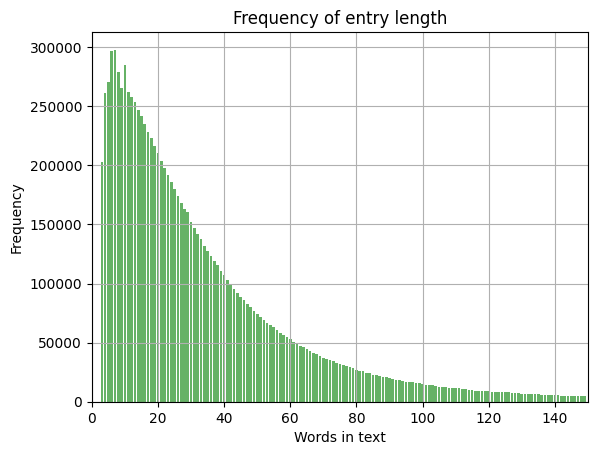

In [21]:
#distribution of text lengths.
print('distribution of entire comment length')
plot_distribution(pruned_df, 150)

Split data into sentences

preprocessed_sentences
Average number of words per entry: 8.99519163590672
Standard deviation of words per entry: 7.501100761401103
Median number of words per entry: 7.0
Minimum number of words per entry: 1
Maximum number of words per entry: 149
25th percentile of words per entry: 4.0
75th percentile of words per entry: 12.0
5th percentile of words per entry: 1.0
95th percentile of words per entry: 22.0


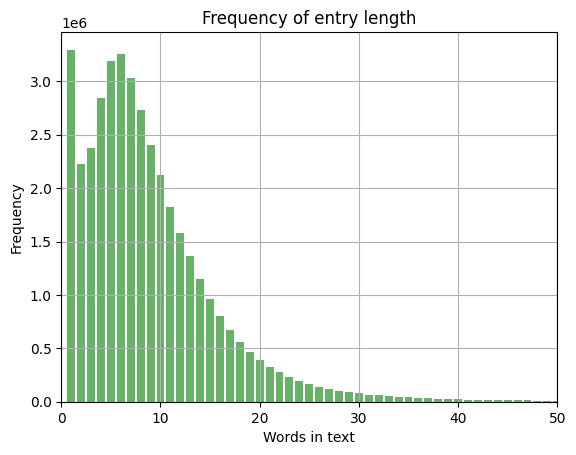

In [20]:
#Statistics on the sentence dataset
pruned_df_sentences = make_sentence_df(pruned_df, 'comment')
pruned_df_sentences = pruned_df_sentences[~pruned_df_sentences['num_words'].isna()]
print('preprocessed_sentences')
mean_words, std_words, median_words, min_words, max_words, percentile_25, percentile_75, percentile_5, percentile_95 = calculate_word_statistics(pruned_df_sentences, 'sentences')
plot_distribution(pruned_df_sentences)

#save_df = pruned_df_exploded[['num_words', 'sentences']]
#can be used for clustering
#save_df.to_csv('careplan_sentences_preprocessed.csv', index=False)

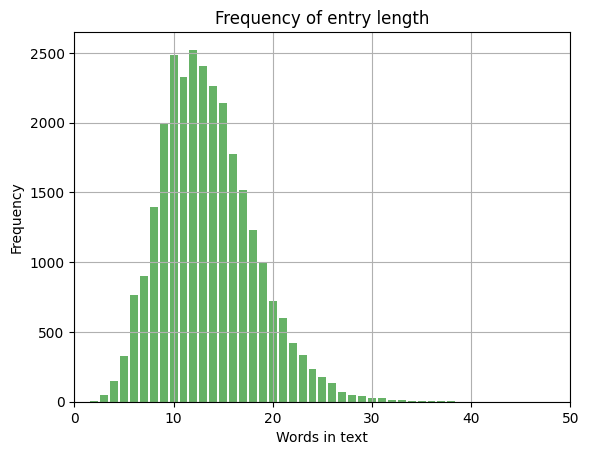

In [24]:
#Compare with example generated data
example_gen_df = pd.read_pickle("E:\Data_exploration\GitHub\paraphraser_code\data\generated\generated_correct_medical_augmented_5k_v1.pkl")
example_df = example_gen_df.sample(frac=1).reset_index(drop=True)
sentences_examples_df = make_sentence_df(example_df, 'Generated')
sentences_examples_df = sentences_examples_df[['sentences', 'num_words']]
#sentences_examples_df.to_csv('sentences_examples.csv')
sentences_examples_df.head(1)
plot_distribution(sentences_examples_df)

Average number of words per entry: 13.248410203932462
Standard deviation of words per entry: 4.634755693594903
Median number of words per entry: 13.0
Minimum number of words per entry: 1
Maximum number of words per entry: 49
25th percentile of words per entry: 10.0
75th percentile of words per entry: 16.0
5th percentile of words per entry: 7.0
95th percentile of words per entry: 22.0


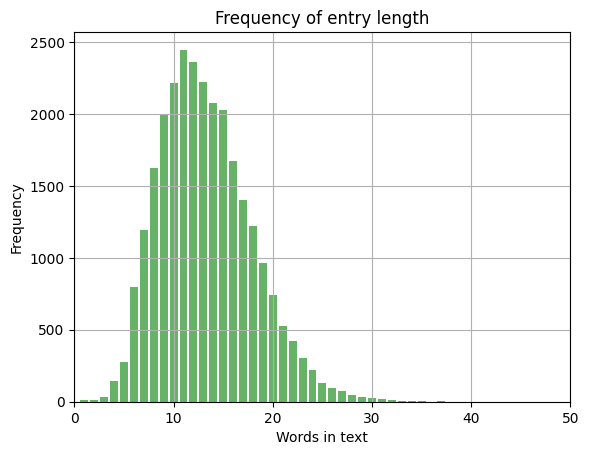

In [26]:
#compare with keyword generated text
keyword_generated_df = pd.read_csv('E:\Data_exploration\GitHub\paraphraser_code\data\generated\generated_keyword3_v4.csv')
keyword_generated_df_exploded = make_sentence_df(keyword_generated_df, 'Generated')
mean_words, std_words, median_words, min_words, max_words, percentile_25, percentile_75, percentile_5, percentile_95 = calculate_word_statistics(keyword_generated_df_exploded, 'sentences')
plot_distribution(keyword_generated_df_exploded)

Capture vocabulary of real data for spellchecker

In [27]:
#Count words in the corpus
def get_sorted_word_counts(df, column_name):
    word_counts = collections.defaultdict(int)
    for text in df[column_name]:
        if isinstance(text, str):
            words = re.findall(r'\b\w+\b', text)
            for word in words:
                word_counts[word.lower()] += 1
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_words = {word: count for word, count in sorted_word_counts}
    return sorted_words

sorted_words = get_sorted_word_counts(pruned_df,'comments')
sorted_words

{'mevrouw': 15036062,
 'de': 12409313,
 'en': 8253029,
 'meneer': 6317698,
 'het': 5813140,
 'met': 5737832,
 'is': 5515449,
 'in': 5195601,
 'op': 4896688,
 'van': 4413842,
 'heeft': 4371475,
 'een': 4301883,
 'te': 4203729,
 'niet': 4071776,
 'was': 3489836,
 'dat': 3193692,
 'haar': 3169548,
 'aan': 3103924,
 'naar': 3097223,
 'om': 2760858,
 'ik': 2401860,
 'bij': 2331063,
 'voor': 2306123,
 'zijn': 2238706,
 'bed': 2044000,
 'goed': 1929058,
 'nog': 1834101,
 'dit': 1793354,
 'er': 1744038,
 'ook': 1731286,
 'geen': 1639149,
 'ze': 1528138,
 'wel': 1423781,
 'had': 1419821,
 'weer': 1327347,
 'maar': 1317411,
 'wat': 1269689,
 'erg': 1258586,
 'uit': 1249539,
 'vanmorgen': 1161021,
 'uur': 1113727,
 'of': 1077552,
 'over': 1003967,
 'gaat': 935119,
 'na': 929929,
 'veel': 917446,
 'nu': 915574,
 'vanavond': 897424,
 'door': 895578,
 'wilde': 887636,
 'meer': 853247,
 'geholpen': 845219,
 'deze': 831733,
 'kan': 819413,
 'hij': 804631,
 'graag': 803313,
 'dan': 790602,
 '2': 783679

In [28]:
def filter_words_by_occurrences(word_counts, min_occurrences):
    filtered_words = {word: count for word, count in word_counts.items() if count >= min_occurrences}
    return filtered_words

In [29]:
#Filtered words has all words up to a certain occurance threshold
total_counts = sum(sorted_words.values())
total_counts

#only words that occur every 2.5 million words.
min_occurrences_threshold = total_counts/2500000
filtered_words = filter_words_by_occurrences(sorted_words, min_occurrences_threshold)
filtered_words

{'mevrouw': 15036062,
 'de': 12409313,
 'en': 8253029,
 'meneer': 6317698,
 'het': 5813140,
 'met': 5737832,
 'is': 5515449,
 'in': 5195601,
 'op': 4896688,
 'van': 4413842,
 'heeft': 4371475,
 'een': 4301883,
 'te': 4203729,
 'niet': 4071776,
 'was': 3489836,
 'dat': 3193692,
 'haar': 3169548,
 'aan': 3103924,
 'naar': 3097223,
 'om': 2760858,
 'ik': 2401860,
 'bij': 2331063,
 'voor': 2306123,
 'zijn': 2238706,
 'bed': 2044000,
 'goed': 1929058,
 'nog': 1834101,
 'dit': 1793354,
 'er': 1744038,
 'ook': 1731286,
 'geen': 1639149,
 'ze': 1528138,
 'wel': 1423781,
 'had': 1419821,
 'weer': 1327347,
 'maar': 1317411,
 'wat': 1269689,
 'erg': 1258586,
 'uit': 1249539,
 'vanmorgen': 1161021,
 'uur': 1113727,
 'of': 1077552,
 'over': 1003967,
 'gaat': 935119,
 'na': 929929,
 'veel': 917446,
 'nu': 915574,
 'vanavond': 897424,
 'door': 895578,
 'wilde': 887636,
 'meer': 853247,
 'geholpen': 845219,
 'deze': 831733,
 'kan': 819413,
 'hij': 804631,
 'graag': 803313,
 'dan': 790602,
 '2': 783679

In [31]:
def read_counter_from_file(file_path):
    # Read the content of the text file and create a Counter dictionary
    counter = Counter()
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:  # Check if the line has the expected format
                word, freq = parts
                counter[word] = int(freq)
    return counter

def combine_counters(base_counter, custom_counter):
    base_counter.update(custom_counter)
    return base_counter

def save_counter_to_file(counter, file_path):
    with open(file_path, 'w') as file:
        for word, freq in counter.items():
            file.write(f"{word} {freq}\n")
#found at opentaal github
freq_path = "E:/Data_exploration/GitHub/paraphraser_code/data_preparation/spellchecker/nl.txt"
counter_from_txt = read_counter_from_file(freq_path)

new_counter = combine_counters(counter_from_txt, filtered_words)

#saved you get the nl_with_corpus.txt file with words and occurances.
#save_counter_to_file(new_counter, 'nl_with_corpus.txt')

Capture distribution of sentence lengths original data --- SCRAPPED IDEA

In [34]:
counts = preprocessed_df['num_words'].value_counts()
counts_df = counts.reset_index()

# Rename the columns to give them specific names
counts_df.columns = ['number', 'number_occurance']
#counts_df.to_csv('pruned_distribution3to110.csv', index=False)

In [85]:
pd.read_csv('pruned_distribution3to110.csv')

,number,number_occurance
0,7,297765
1,6,297039
2,10,285055
3,8,278855
4,5,270174
...,...,...
102,105,12850
103,106,12672
104,107,12222
105,108,11960
